# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 16. Data Visualization (part 3)

### Date: October 20, 2022

### To-Dos From Last Class:

* Brainstorm Final Assignment ideas :)
    
### Today:

1. Briefly review wrangling steps (not part of assignment 4!)
2. Plotting in ggplot
    1. ggplot template
    2. Layers
    3. Grouping the data (Fill & Color)
    4. Other formatting stuff (Themes)
    5. Spotting / labelling outliers
3. Review Assignment 4 starter

### Homework

* Assignment 4: <a href="https://www.dropbox.com/request/TRf86lmPH0wBHcq8GdSG">Data Visualization</a> (before 10/27, 23:00 MDT)

## Reminder: Imitation inhibition task dataset

<img src="img/ait_task.png" width=500>

* 20 trials per condition (100 total responses for each participant)
    * Average across cued response finger
* Condition mapping:
    1. Baseline 
    2. Effector congruent 
    3. Effector incongruent
    4. Movement congruent
    5. Movement incongruent

# Part 1A: Reading in the dataset

* Load the tidyverse package
* Assign filepath
* Read in the data

In [1]:
library(tidyverse) #look into suppressPackageStartupMessages

# read in the data
data_dir <- 'misc_exercises/imitation_inhibition_paradigm/data/second'
file <- 'ait_trialwise.csv'

# reading in the dataset
df <- read_csv(paste(data_dir,file,sep='/'))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Group = col_character(),
  pid = col_character(),
  Name.1 = col_character(),
  Name.2 = col_character(),
  Name.3 = col_character(),
  Response = col_character(),
  Key = col_character(),
  Released = col_character(),
  Response.1 = col_character(),
  Code = col_character(),
  `(Trial Variable)` = col_logical(),
  Correct = col_logical()
)
ℹ Use `spec()` for the full column specifications.



# 1B. Compute summary RT and error rate (ER) data by participant/condition
## All of this wrangling stuff could already have been done in Python. <br> Including them here to show you some of the Pandas analogues for wrangling in R/Tidyverse. <br><span style="color:blue">IMPORTANT NOTE: I will do the wrangling for you in R for Assignment 4 and 5 starters</span>

* Wrangling options shown both with and without Tidyverse's piping function
* Basic goal: Set up data frames that lend themselves well to plotting "scatterbox" visualizations of...
    * task performance by 1 x 5-level factor (across all 5 Congruence stimuli)
    * task performance separated by 2 x 3-level factors (stimulus type: movement, effector, baseline) x 2 (congruence: congruent, incongruent, baseline)

In [14]:
# ### WITHOUT PIPES ###
# # basic syntax: df <- mutate(df,varname = formula)

# # this chunk recodes the "Congruence" integers as more informative string variable named str_condi
# df <- mutate(df,str_condi = ifelse(Congruence == 0,'base',
#                                   ifelse(Congruence==1,'eff_con',
#                                         ifelse(Congruence==2,'eff_inc',
#                                               ifelse(Congruence==3,'move_con',
#                                                     ifelse(Congruence==4,'move_inc',''))))))
# # this chunk creates "stim_type" and "sr_congruence" variables based on the "str_condi" variable prefix (grepl(^...)) and suffix (grepl(...$))
# df <- mutate(df,stim_type = ifelse(grepl('^eff',str_condi),'effector',
#                                    ifelse(grepl('^move',str_condi),'movement',
#                                           'baseline')))
# df <- mutate(df,sr_congruence = ifelse(grepl('con$', str_condi),'congruent',
#                                        ifelse(grepl('inc$',str_condi),'incongruent',
#                                               'baseline')))
# df <- mutate(df,error_integer = ifelse(Code=="C",0,1))

# # Here we compute summary statistics tables of RT and ERROR RATE by subject and str_condi
# df_sum <- group_by(df,pid,str_condi)
# df_sum <- summarise(df_sum,N = n(),RT = mean(Time),ER = sum(error_integer)/N)
# df_sum <- select(df_sum,(-N))
# head(df_sum) # prints the first ten rows

# # Here we compute summary statistics tables of RT and ERROR RATE by subject, stim_type, and sr_congruence
# df_sum_sep <- group_by(df,pid,stim_type,sr_congruence)
# df_sum_sep <- summarise(df_sum_sep,N = n(),RT = mean(Time),ER = sum(error_integer)/N)
# df_sum_sep <- select(df_sum_sep,(-N))
# head(df_sum_sep)


In [2]:
### WITH PIPES ###
# basic syntax: df <- df %>% mutate(varname = formula)

# this chunk recodes the "Congruence" integers as more informative string variable named str_condi
df <- df %>%
    mutate(str_condi = ifelse(Congruence==0,'base',
                                ifelse(Congruence==1,'eff_con',
                                      ifelse(Congruence==2,'eff_inc',
                                            ifelse(Congruence==3,'move_con',
                                                  ifelse(Congruence==4,'move_inc','')))))) %>%
# this chunk creates "stim_type" and "sr_congruence" variables based on the "str_condi" variable prefix (grepl(^...)) and suffix (grepl(...$))
    mutate(stim_type = ifelse(grepl('^eff',str_condi),'effector',
                              ifelse(grepl('^move',str_condi),'movement',
                                     'baseline'))) %>%
    mutate(sr_congruence = ifelse(grepl('con$', str_condi),'congruent',
                            ifelse(grepl('inc$',str_condi),'incongruent',
                                   'baseline'))) %>%
    mutate(error_integer = ifelse(Code=="C",0,1))

# Here we compute summary statistics tables of RT and ERROR RATE by subject and str_condi
df_sum <- df %>%
    group_by(pid,str_condi) %>%
    summarise(N = n(),
             reaction_time = mean(Time), # mean RT
             error_rate = sum(error_integer)/N) %>% # error rate = # of errors / N
    select(-N) # don't need the count anymore, just needed to computer error rate
head(df_sum) # prints the first ten rows

# Here we compute summary statistics tables of RT and ERROR RATE by subject, stim_type, and sr_congruence
df_sum_sep <- df %>%
    group_by(pid,stim_type,sr_congruence) %>%
    summarise(N = n(),
              reaction_time = mean(Time),
              error_rate = sum(error_integer)/N) %>%
    select(-N)
head(df_sum_sep) # prints the first ten rows


`summarise()` has grouped output by 'pid'. You can override using the `.groups` argument.


pid,str_condi,reaction_time,error_rate
<chr>,<chr>,<dbl>,<dbl>
P1,base,569.0000,0
P1,eff_con,565.0714,0
P1,eff_inc,543.7273,0
P1,move_con,580.4000,0
P1,move_inc,561.5238,0
P10,base,631.6500,0


`summarise()` has grouped output by 'pid', 'stim_type'. You can override using the `.groups` argument.


pid,stim_type,sr_congruence,reaction_time,error_rate
<chr>,<chr>,<chr>,<dbl>,<dbl>
P1,baseline,baseline,569.0000,0
P1,effector,congruent,565.0714,0
P1,effector,incongruent,543.7273,0
P1,movement,congruent,580.4000,0
P1,movement,incongruent,561.5238,0
P10,baseline,baseline,631.6500,0


# 2A. ggplot template

* Note: ggplot reference for different geom_functions etc.
    * https://ggplot2.tidyverse.org/reference/

In [3]:
# ggplot(data = <DATA>) + 
#   <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>)) 

# ggplot initiates a blank plot object
# aes = aesthetic mappings
# geom_functions = geometric objects

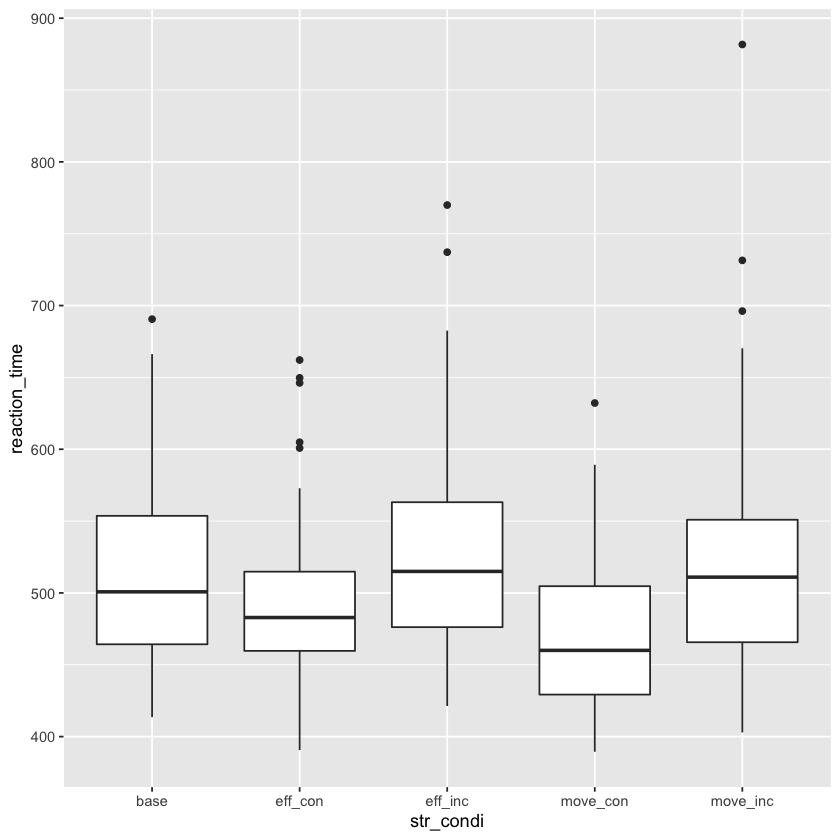

In [5]:
ggplot(df_sum) +
    geom_boxplot(aes(x = str_condi,y = reaction_time))

# 2B. Layers

* Can layer as many different geometric objects (i.e., geom_ thingys) as you like!

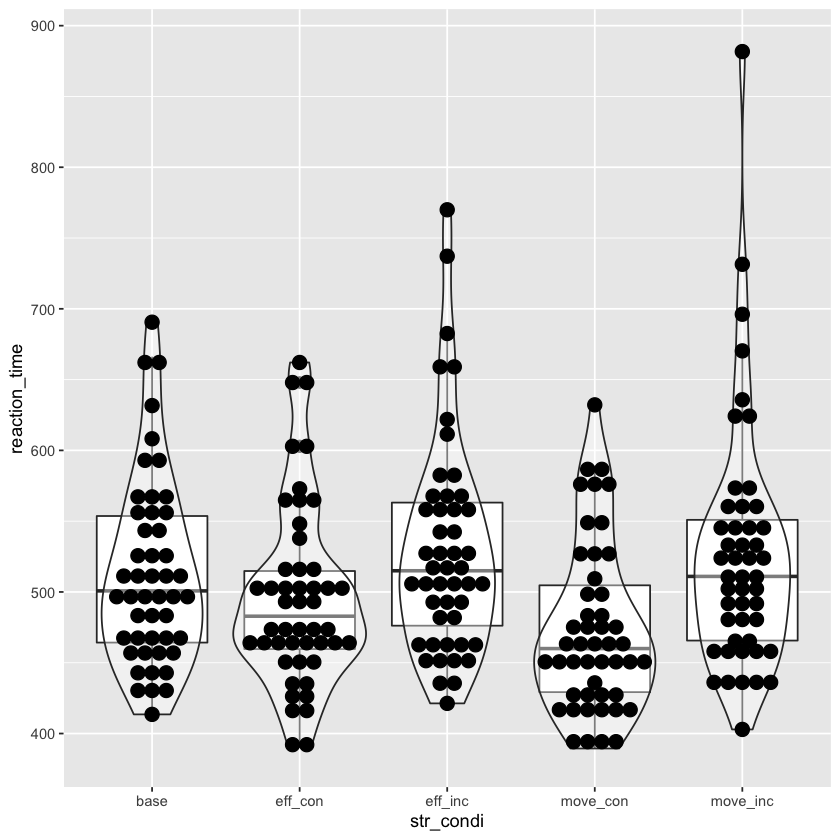

In [10]:
ggplot(df_sum) +
    geom_boxplot(aes(x = str_condi,y = reaction_time)) +
    geom_violin(aes(x = str_condi,y = reaction_time),alpha=0.4) +
    geom_dotplot(aes(x = str_condi, y = reaction_time), color = "black", binaxis='y', binwidth = 10, stackdir='center')

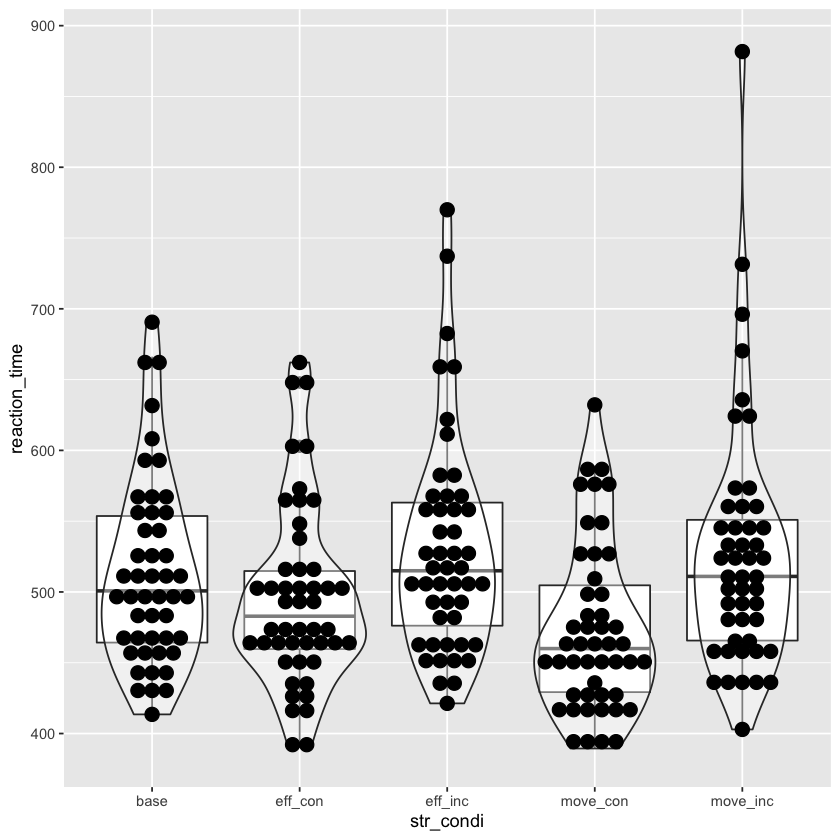

In [11]:
ggplot(df_sum,aes(x = str_condi,y = reaction_time)) +
    geom_boxplot() +
    geom_violin(alpha=0.4) +
    geom_dotplot(color = "black", binaxis='y', binwidth = 10, stackdir='center')

# 2C. Grouping the data (e.g. for visualizing interactions between factors)

* Plotting stim type BY sr_congruence interaction
* Noting the difference between _fill_ and _colour_
    * Fill --> specifying colour to fill a geom
    * Colour --> specifying colour to outline a geom

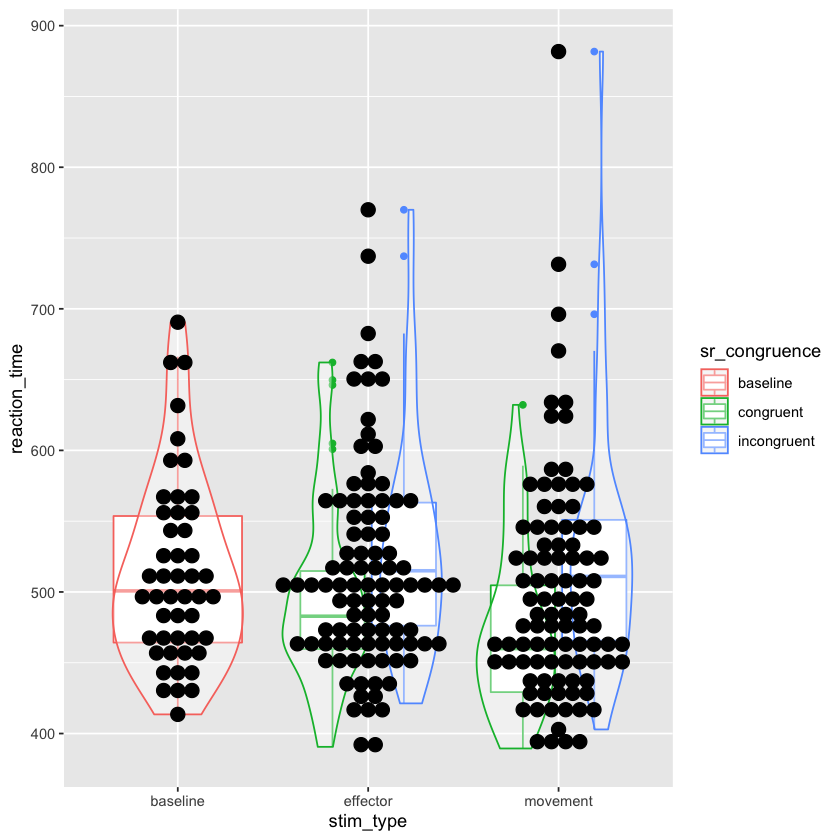

In [15]:
ggplot(df_sum_sep,aes(x = stim_type, y = reaction_time, colour = sr_congruence)) +
    geom_boxplot() +
    geom_violin(alpha=0.4) +
    geom_dotplot(color = "black", binaxis='y', binwidth = 10, stackdir='center')

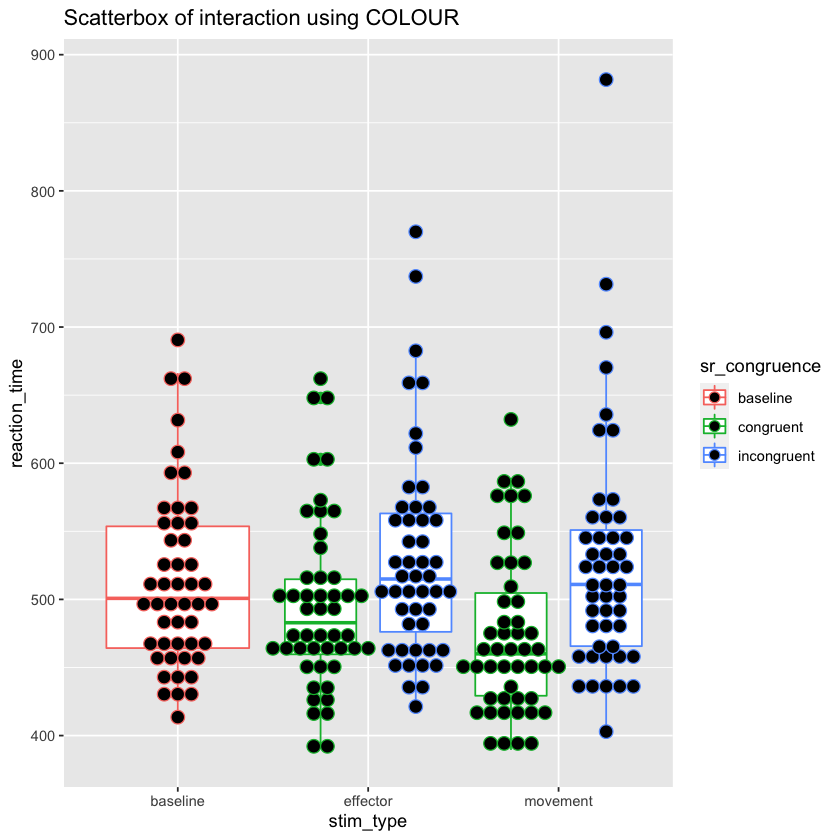

In [20]:
# fixing the position for the interaction plots using position_dodge
dodge <- position_dodge(1)

# plotting with COLOUR
ggplot(df_sum_sep, aes(x = stim_type, y = reaction_time, colour = sr_congruence)) + 
    geom_boxplot(position=dodge) +
    geom_dotplot(position=dodge,binaxis='y',binwidth=10,stackdir='center') + 
    ggtitle('Scatterbox of interaction using COLOUR')

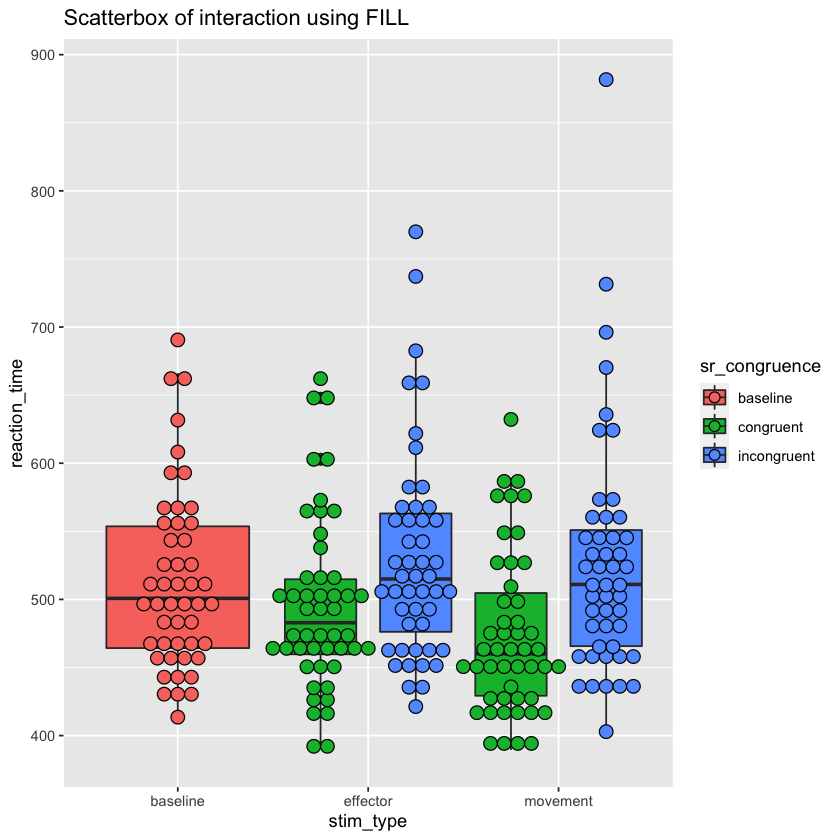

In [21]:
# plotting with FILL
ggplot(df_sum_sep, aes(x = stim_type, y = reaction_time, fill = sr_congruence)) + 
    geom_boxplot(position=dodge) +
    geom_dotplot(position=dodge,binaxis='y',binwidth=10,stackdir='center') + 
    ggtitle('Scatterbox of interaction using FILL')

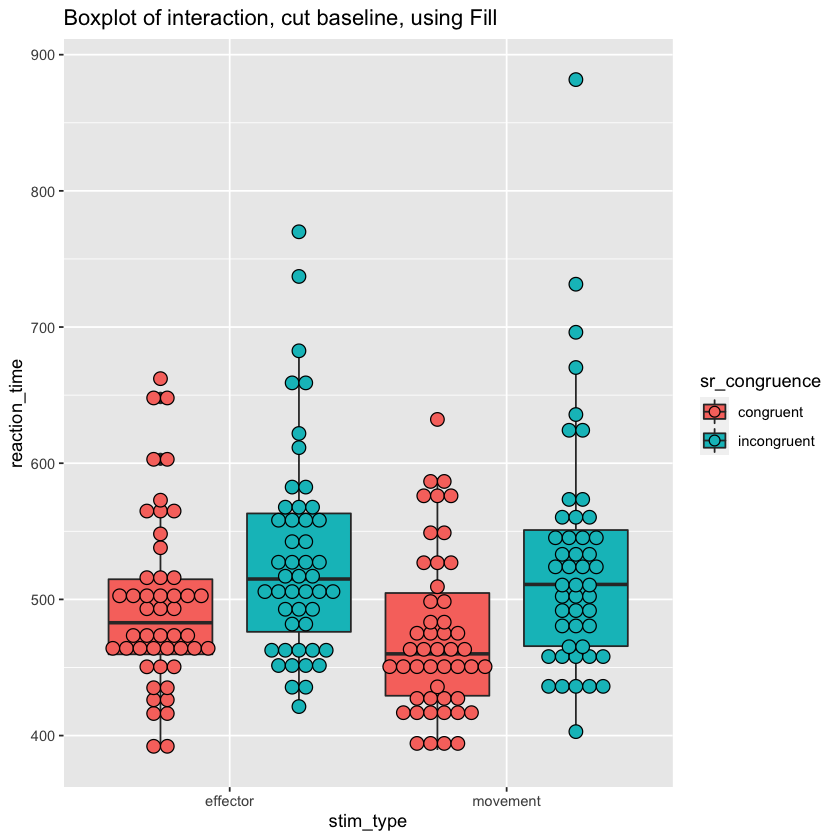

In [22]:
# removing the baseline condition, given it's a 2x2 design with a weird baseline condi mixed it
df_sum_sep_nobase <- df_sum_sep %>%
    filter(sr_congruence!='baseline')

# plotting with FILL no baseline
ggplot(df_sum_sep_nobase, aes(x = stim_type, y = reaction_time, fill = sr_congruence)) + 
    geom_boxplot(position=dodge) +
    geom_dotplot(position=dodge,binaxis='y',binwidth=10,stackdir='center') +
    ggtitle('Boxplot of interaction, cut baseline, using Fill')

# 2D. Formatting the plots (Themes)

* Plot outline / background
* Axis labels

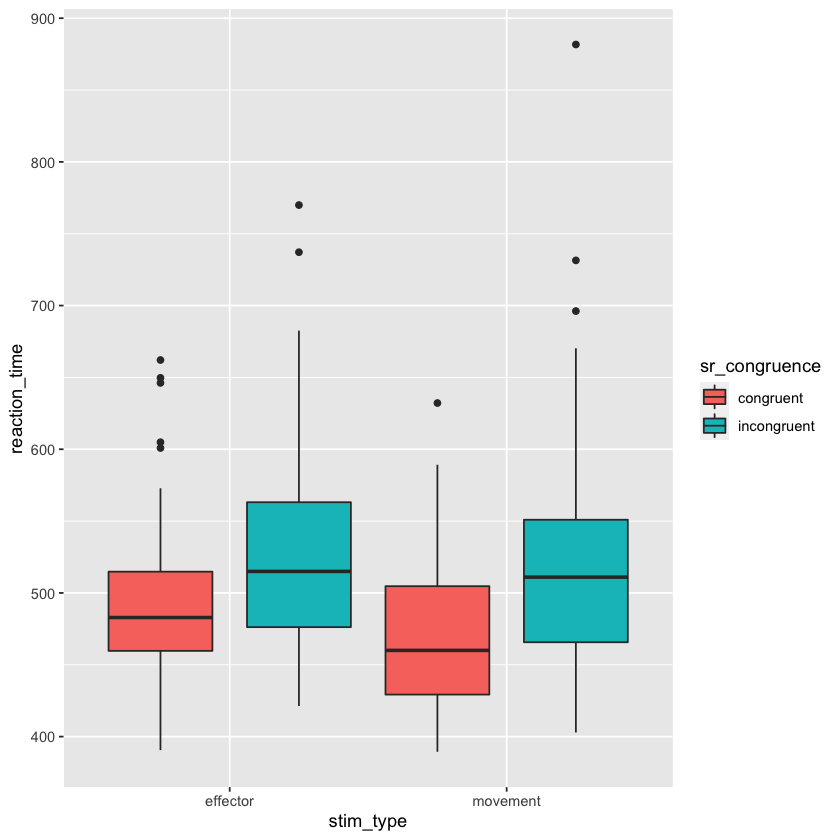

In [24]:
default_format <- ggplot(df_sum_sep_nobase, aes(x = stim_type, y = reaction_time, fill = sr_congruence)) + 
    geom_boxplot(position=dodge)
plot(default_format)

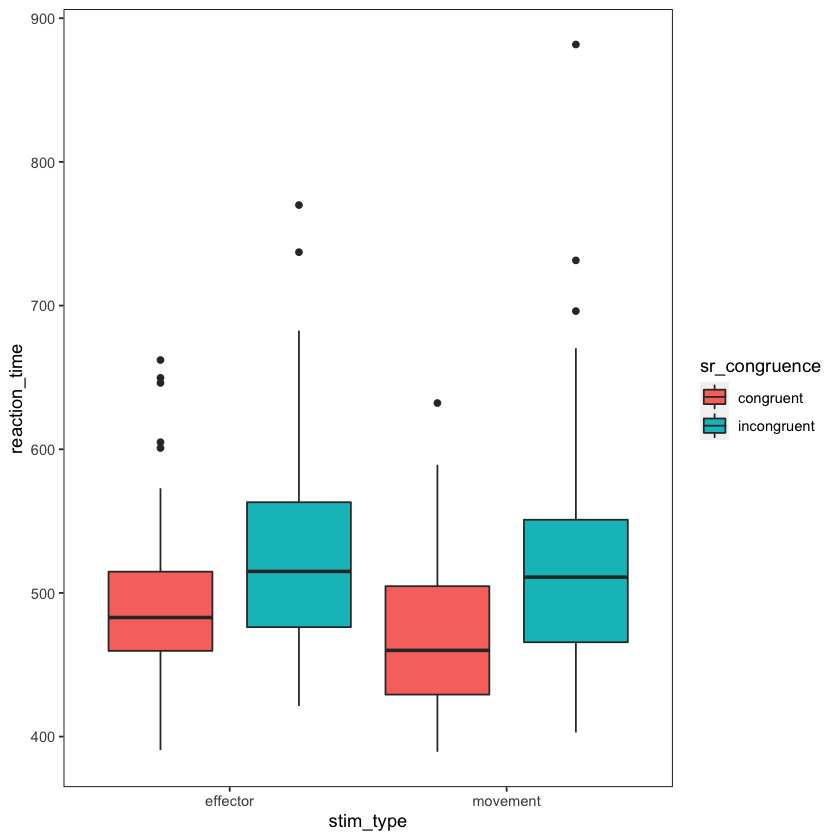

In [25]:
default_format +
    theme(panel.background = element_rect(fill = "#ffffff", color  =  NA),
         panel.border = element_rect(fill = NA, color = "black"))

In [26]:
# some stuff you can steal for customizing data visualizations:

# Many palettes available online, can customize
# these are from: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9
my_palette <- c("#0000FF","#FF0000","#3ADF00","#ff7f00","#6a3d9a",
                "#a6cee3","#b2df8a","#fb9a99","#fdbf6f","#cab2d6",
                "#8dd3c7","#bebada","#d9d9d9","#fccde5","#ffffb3")

# This is the basic function I use for all the ggplots I create. 
# Modified from this black themed ggplot function: https://gist.github.com/jslefche/eff85ef06b4705e6efbc
my_theme = function(base_size = 24, base_family = "") {
  
  theme_grey(base_size = base_size, base_family = base_family) %+replace%
    
    theme(
      # Specify axis options
      axis.line = element_blank(),  
      axis.text.x = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.text.y = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.ticks = element_line(color = "black", size  =  0.2),
      axis.title.x = element_text(size = base_size, color = "black", margin = margin(10, 0, 0, 0)),
      axis.title.y = element_text(size = base_size, color = "black", angle = 90, margin = margin(0, 10, 0, 0)),  
      axis.ticks.length = unit(0.3, "lines"),   
      # Specify legend options
      legend.background = element_rect(color = NA, fill = "#ffffff"),  
      legend.key = element_rect(color = "black",  fill = "#ffffff"),  
      legend.key.size = unit(2, "lines"),  
      legend.key.height = NULL,  
      legend.key.width = NULL,      
      legend.text = element_text(size = base_size*0.8, color = "black"),  
      legend.title = element_text(size = base_size*0.8, face = "bold", hjust = 0, color = "black"),
      legend.position = "right",  
      legend.text.align = NULL,  
      legend.title.align = NULL,  
      legend.direction = "vertical",  
      legend.box = NULL, 
      # Specify panel options
      panel.background = element_rect(fill = "#ffffff", color  =  NA),  
      panel.border = element_rect(fill = NA, color = "black"),  
      panel.grid.major = element_line(color = "#ffffff"),  
      panel.grid.minor = element_line(color = "#ffffff"),  
      panel.spacing = unit(2, "lines"),
      # Specify facetting options
      strip.background = element_rect(fill = "grey30", color = "grey10"),  
      strip.text.x = element_text(size = base_size*0.8, color = "black"),  
      strip.text.y = element_text(size = base_size*0.8, color = "black",angle = -90),  
      # Specify plot options
      plot.background = element_rect(color = "#ffffff", fill = "#ffffff"),  
      plot.title = element_text(size = base_size*1.2, color = "black"),  
      plot.margin = unit(rep(1, 4), "lines")
    ) 
}

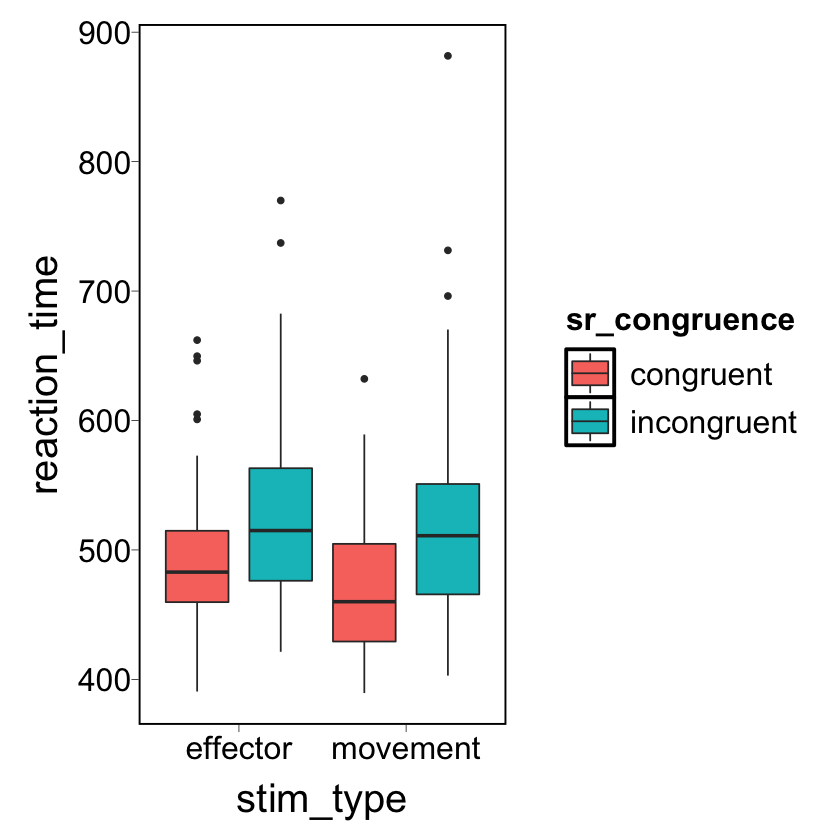

In [27]:
default_format + my_theme()

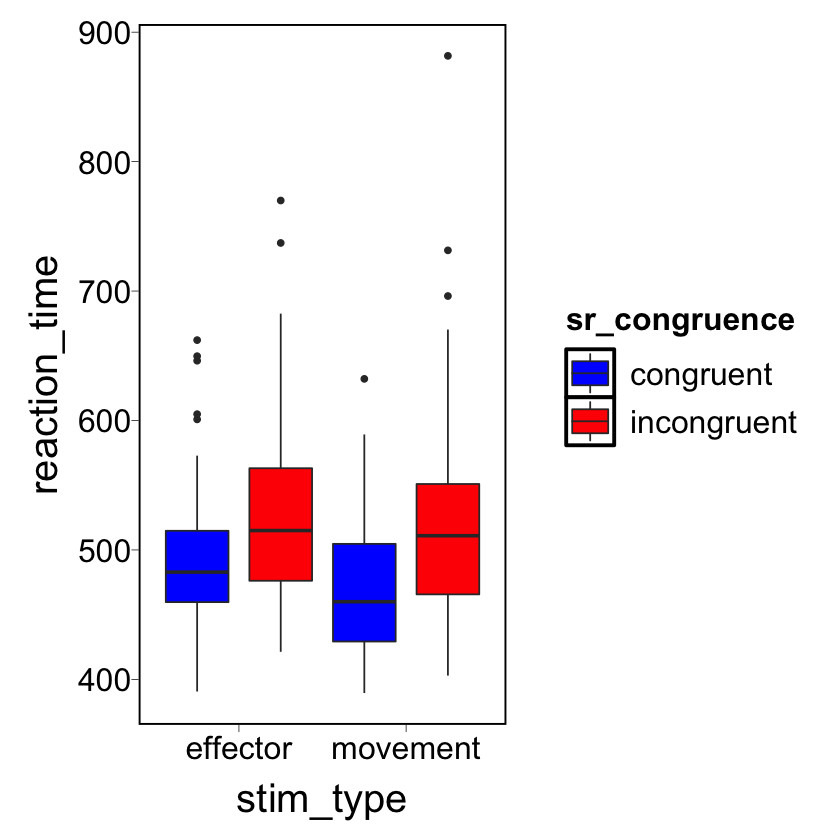

In [28]:
default_format + my_theme() + scale_fill_manual(values=my_palette)

# 2E. Spotting + Labeling Outliers

* Plotting speed-accuracy tradeoff scatter
* Labelling points by participant ID to figure out who I should look into further

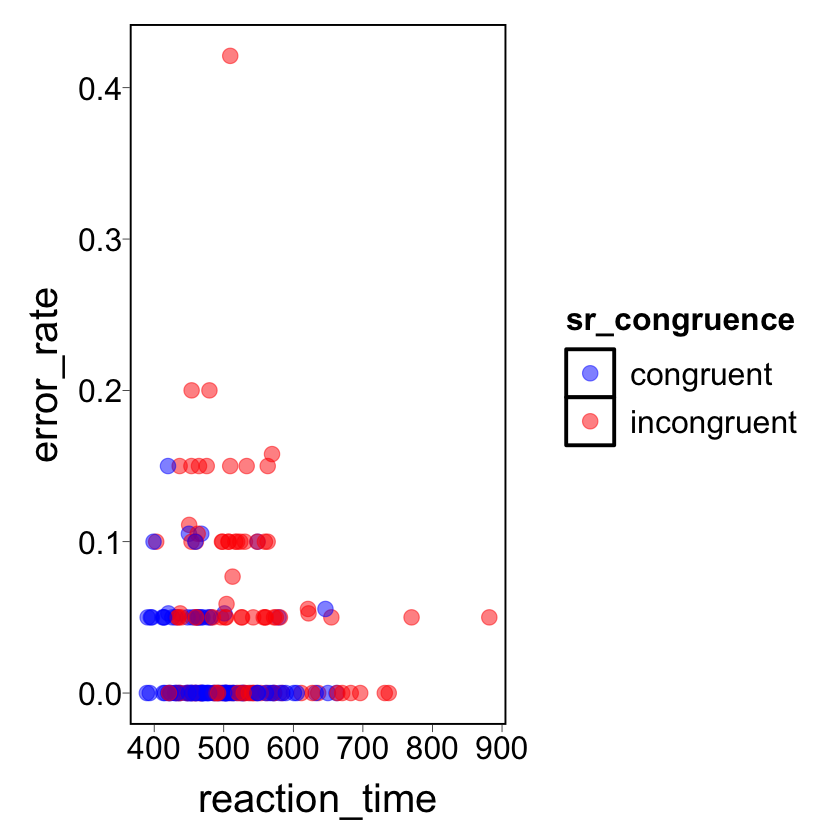

In [29]:
ggplot(df_sum_sep_nobase,aes(x = reaction_time, y = error_rate, colour = sr_congruence)) +
    geom_point(size = 4,alpha=0.5) + 
    my_theme() + 
    scale_colour_manual(values = my_palette)

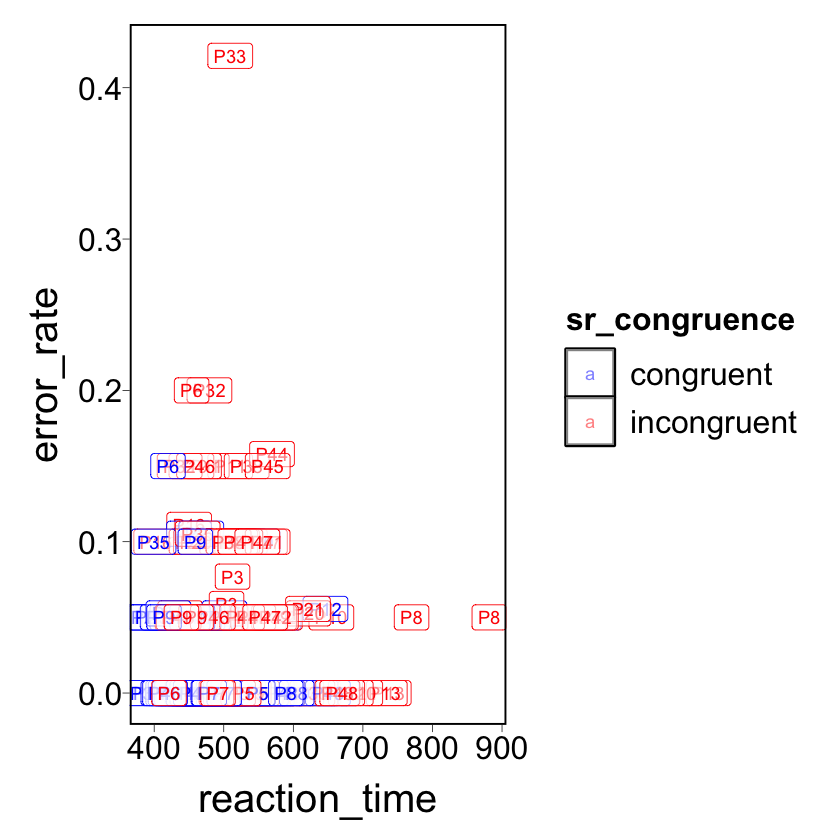

In [30]:
ggplot(df_sum_sep_nobase,aes(x = reaction_time, y = error_rate, colour = sr_congruence,label=pid)) +
    geom_label(alpha=0.5) + 
    my_theme() + 
    scale_colour_manual(values = my_palette)